# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')

### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

<AxesSubplot:xlabel='item_name', ylabel='Count'>

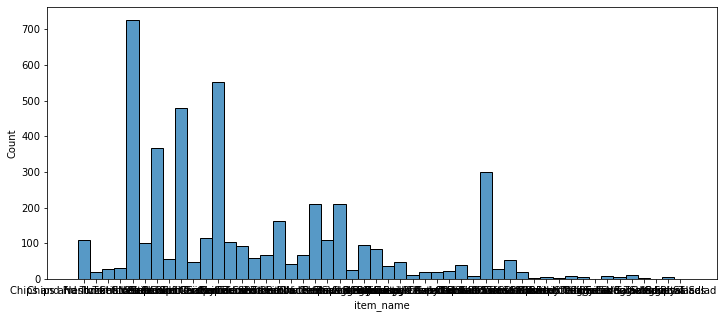

In [4]:
plt.figure(figsize=(12,5))
sns.histplot(data=chipo, x="item_name")

Better way

In [5]:
x = chipo["item_name"].value_counts().reset_index().loc[0:4]
x

,index,item_name
0,Chicken Bowl,726
1,Chicken Burrito,553
2,Chips and Guacamole,479
3,Steak Burrito,368
4,Canned Soft Drink,301


Text(0.5, 1.0, "Most ordered Chipotle's Items")

<Figure size 864x360 with 0 Axes>

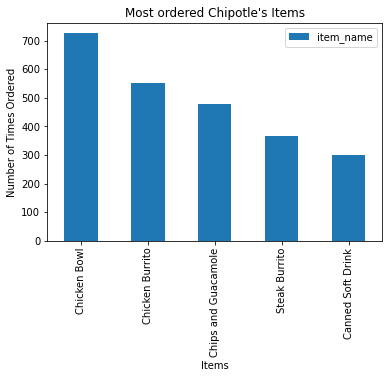

In [6]:
plt.figure(figsize=(12,5))
x.plot(kind='bar', x="index", y="item_name")
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [7]:
chipo["item_price"][0].split("$")[-1]

'2.39 '

In [8]:
x = chipo["item_price"].apply(lambda x: x.split("$")[-1])
chipo["item_price"] = x.astype(float)
chipo["item_price"].dtypes

dtype('float64')

In [9]:
order = chipo.groupby("order_id").sum()
order.head(2)

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98


<AxesSubplot:xlabel='item_price', ylabel='quantity'>

<Figure size 864x360 with 0 Axes>

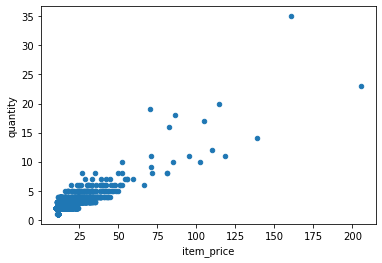

In [10]:
plt.figure(figsize=(12,5))
order.plot.scatter(x='item_price', y='quantity')

<AxesSubplot:xlabel='item_price', ylabel='quantity'>

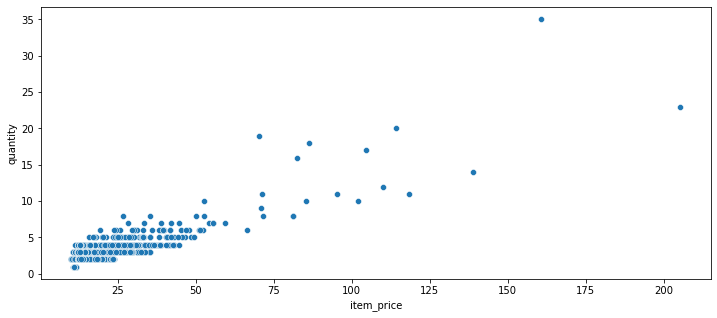

In [11]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=order,x='item_price', y='quantity')